# WEEK 6 Breast Cancer Dataset

Alberto Halim Limantoro - 0706022210054
---


## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/Yurohime/DATA-MINING-SEMESTER-5/refs/heads/main/datasets/UCI%20breast-cancer-wisconsin-data.csv')

df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
60,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.012900,...,11.02,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
377,9013579,B,13.460,28.21,85.89,562.1,0.07517,0.04726,0.012710,0.011170,...,14.69,35.63,97.11,680.6,0.1108,0.14570,0.07934,0.05781,0.2694,0.07061
501,91504,M,13.820,24.49,92.33,595.9,0.11620,0.16810,0.135700,0.067590,...,16.01,32.94,106.00,788.0,0.1794,0.39660,0.33810,0.15210,0.3651,0.11830
207,879830,M,17.010,20.26,109.70,904.3,0.08772,0.07304,0.069500,0.053900,...,19.80,25.05,130.00,1210.0,0.1111,0.14860,0.19320,0.10960,0.3275,0.06469
32,85382601,M,17.020,23.98,112.80,899.3,0.11970,0.14960,0.241700,0.120300,...,20.88,32.09,136.10,1344.0,0.1634,0.35590,0.55880,0.18470,0.3530,0.08482
427,90745,B,10.800,21.98,68.79,359.9,0.08801,0.05743,0.036140,0.014040,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.19270,0.07485,0.2965,0.07662
320,894604,B,10.250,16.18,66.52,324.2,0.10610,0.11110,0.067260,0.039650,...,11.28,20.61,71.53,390.4,0.1402,0.23600,0.18980,0.09744,0.2608,0.09702
92,861853,B,13.270,14.76,84.74,551.7,0.07355,0.05055,0.032610,0.026480,...,16.36,22.35,104.50,830.6,0.1006,0.12380,0.13500,0.10010,0.2027,0.06206
332,897132,B,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
110,864033,B,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.017780,...,11.05,21.47,71.68,367.0,0.1467,0.17650,0.13000,0.05334,0.2533,0.08468


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

3. Show describe column and conclude what the insight is from that column

In [102]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


5. Drop the null column(s)

In [103]:
df.dropna(inplace=True)
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Dropping Un-Related Data

In [108]:
df = df.drop(['id'], axis=1)

df.head()

KeyError: "['id'] not found in axis"

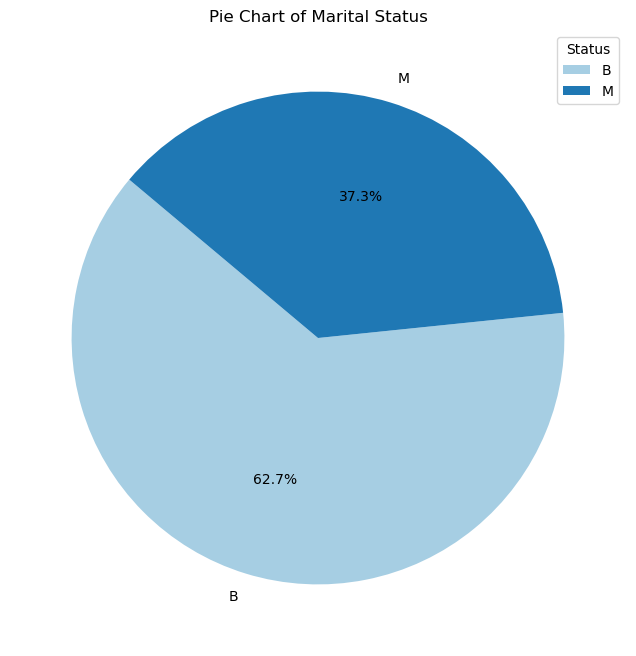

Most Diagnosis are mainly benign which means that most breast cancer case
are harmless or not a threat while 1/3 is malignant


In [109]:
value_counts = df['diagnosis'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Pie Chart of Marital Status' )
plt.legend(title='Status')
plt.show()

print("Most Diagnosis are mainly benign which means that most breast cancer case")
print("are harmless or not a threat while 1/3 is malignant")

Encode the Data

In [110]:
label_encoders = {}
categorical_cols = ['diagnosis']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

# M = 1 / B = 0

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


create a heatmap to see the correlation and explain the conclusion

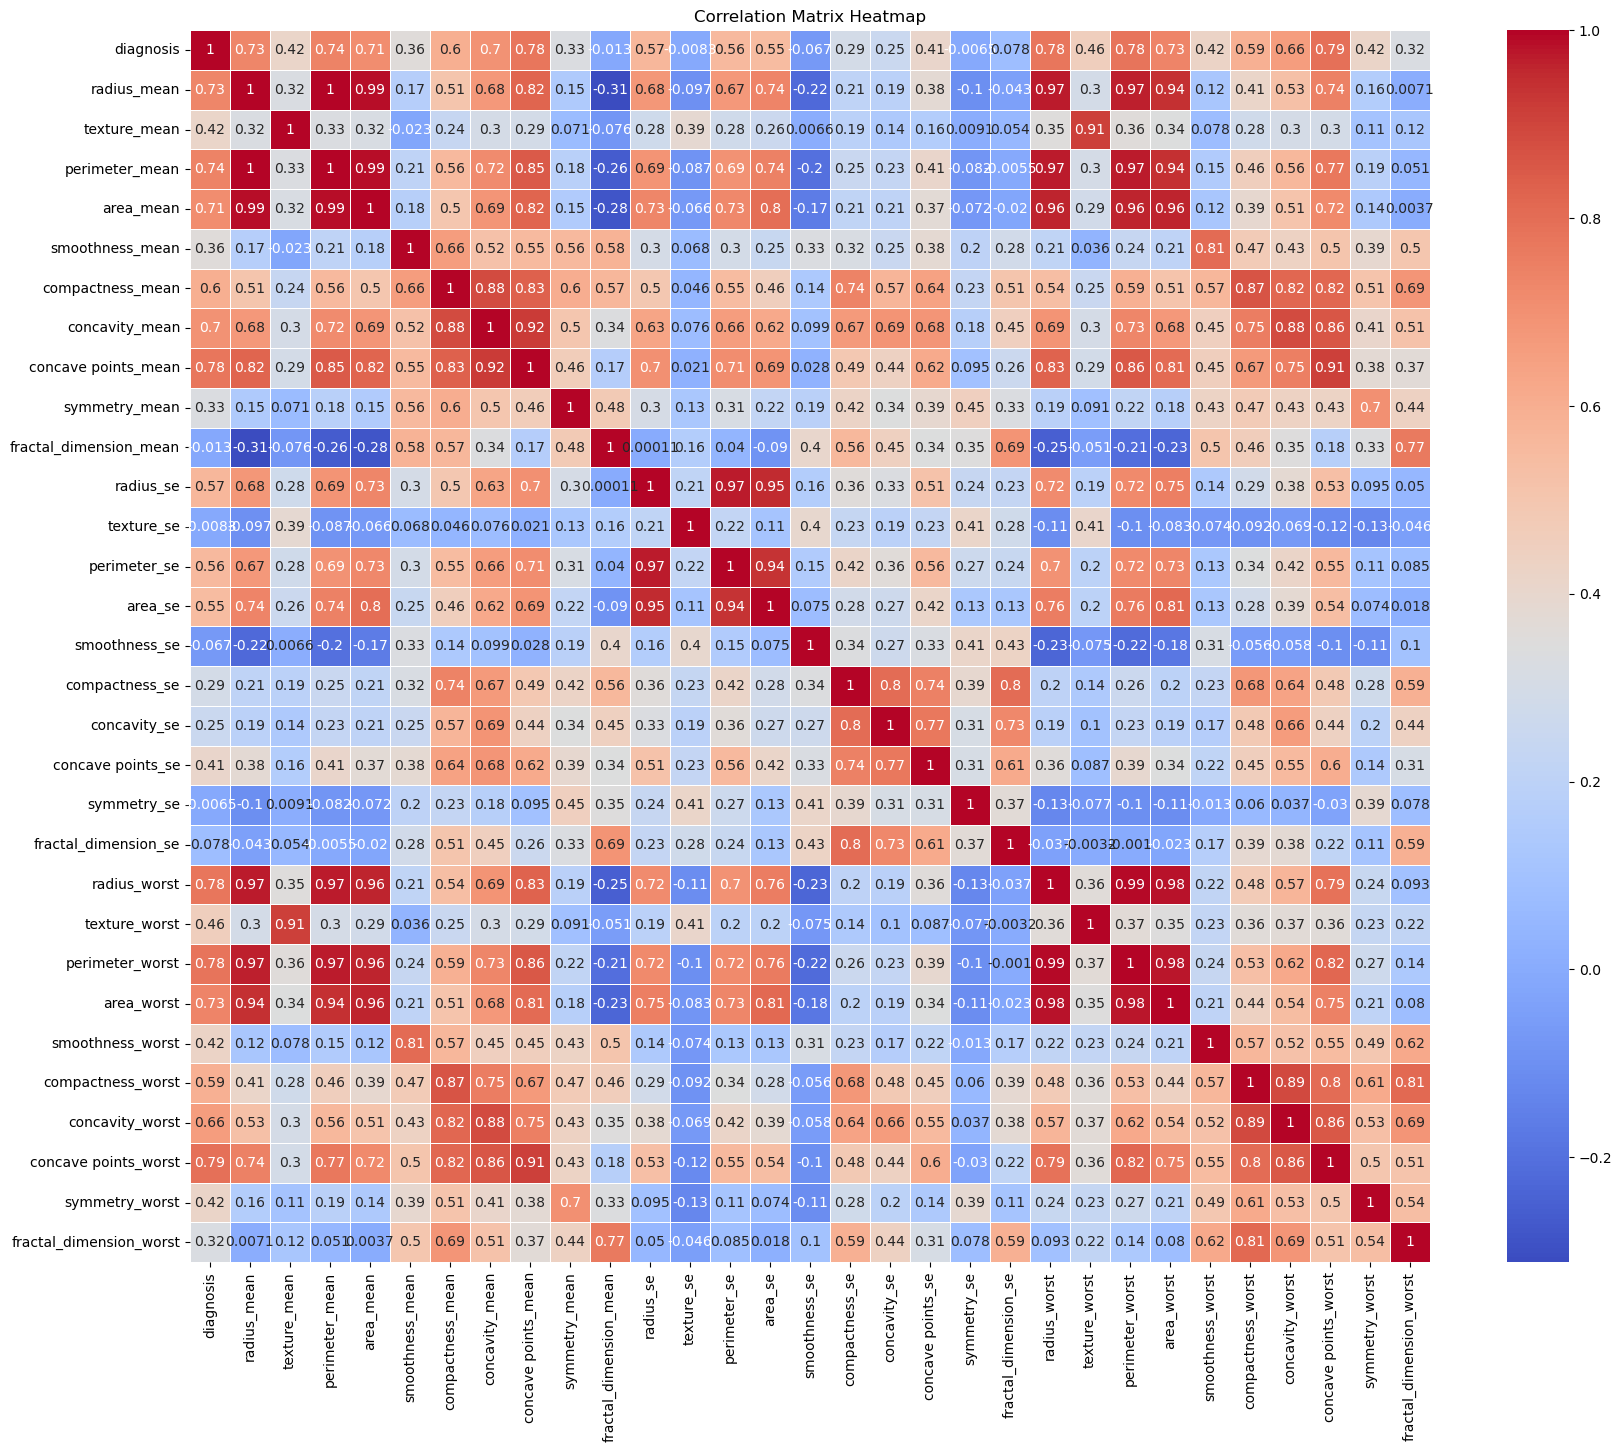

In [111]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Machine Learning

1. Splitting X and y

In [112]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [114]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [115]:
# import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [116]:
# a. Define Model
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [117]:
# b. Predict the test set results
y_pred_en = clf_en.predict(X_test)

In [118]:
# c. Check Accuracy Score
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9561


In [119]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(clf_en.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_en.score(X_test, y_test)))

Training set score: 0.9802
Test set score: 0.9561


[Text(0.5769230769230769, 0.875, 'x[7] <= 0.051\nentropy = 0.952\nsamples = 455\nvalue = [286, 169]'),
 Text(0.3076923076923077, 0.625, 'x[20] <= 16.83\nentropy = 0.314\nsamples = 282\nvalue = [266, 16]'),
 Text(0.15384615384615385, 0.375, 'x[10] <= 0.626\nentropy = 0.136\nsamples = 263\nvalue = [258, 5]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.091\nsamples = 260\nvalue = [257, 3]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.46153846153846156, 0.375, 'x[1] <= 16.19\nentropy = 0.982\nsamples = 19\nvalue = [8, 11]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.8461538461538461, 0.625, 'x[22] <= 114.45\nentropy = 0.517\nsamples = 173\nvalue = [20, 153]'),
 Text(0.7692307692307693, 0.375, 'x[21] <= 25.655\nentropy = 0.994\nsamples = 44\nvalue = [20, 24]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.454\

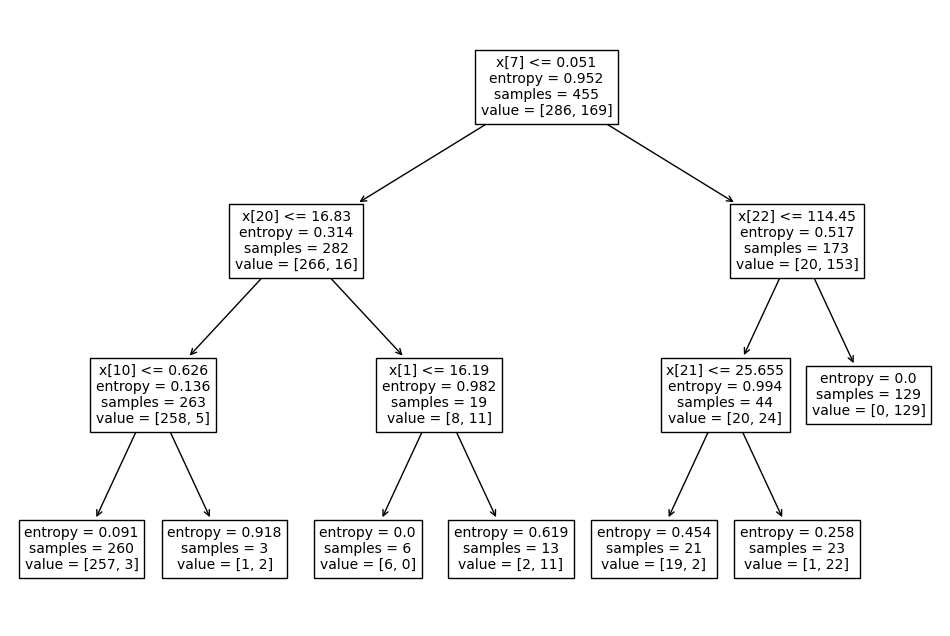

In [120]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))


2. Criterion Gini index

In [121]:
# a. Define Model
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [122]:
# b. Predict the test set results
y_pred_gini = clf_gini.predict(X_test)

In [123]:
# c. Check Accuracy Score
print("Model accuracy score with gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with gini index: 0.9386


In [124]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(clf_gini.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_gini.score(X_test, y_test)))

Training set score: 0.9780
Test set score: 0.9386


[Text(0.5, 0.875, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.25, 0.625, 'x[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.125, 0.375, 'x[10] <= 0.626\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.375, 0.375, 'x[1] <= 16.19\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.75, 0.625, 'x[27] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'),
 Text(0.625, 0.375, 'x[22] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.875, 0.375, 'x[19] <= 0.013\ngini = 0.029\nsamples = 138\nvalue = [2, 136]'

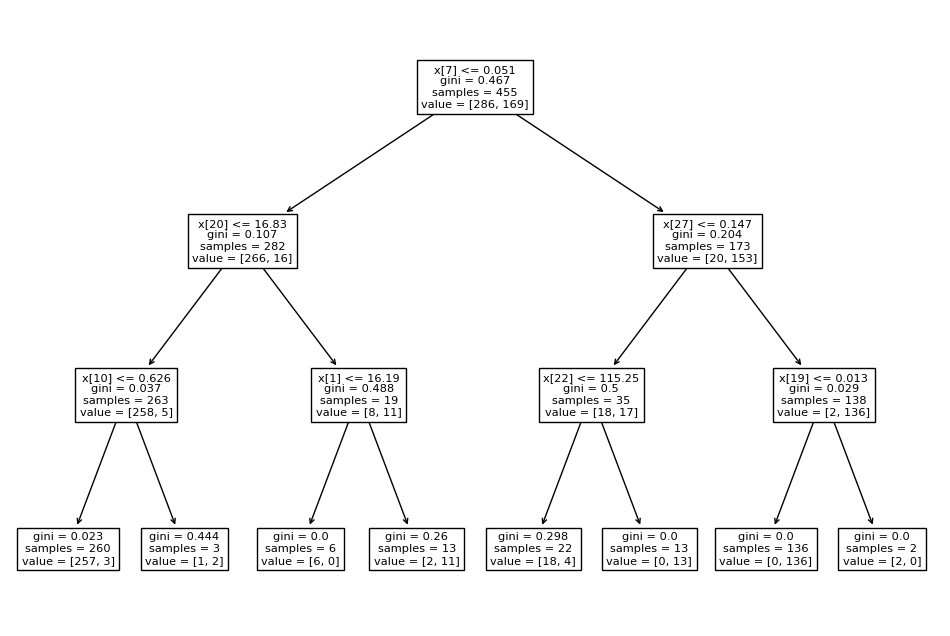

In [125]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

3. Confusion matrix and classification report of criterion Entropy and Gini index

Entropy


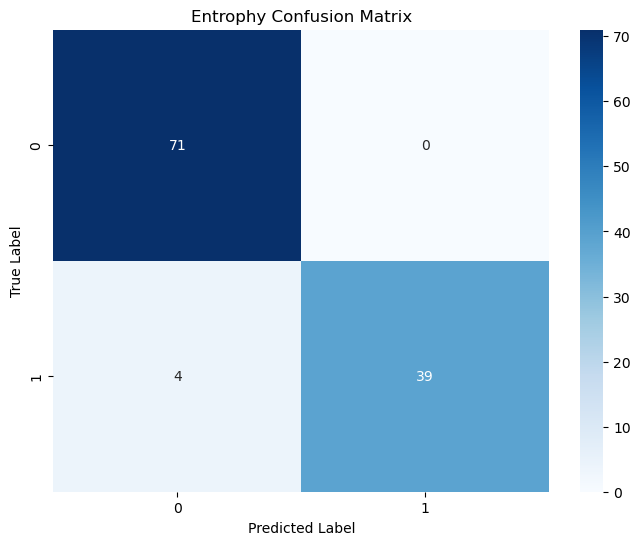


Gini Index


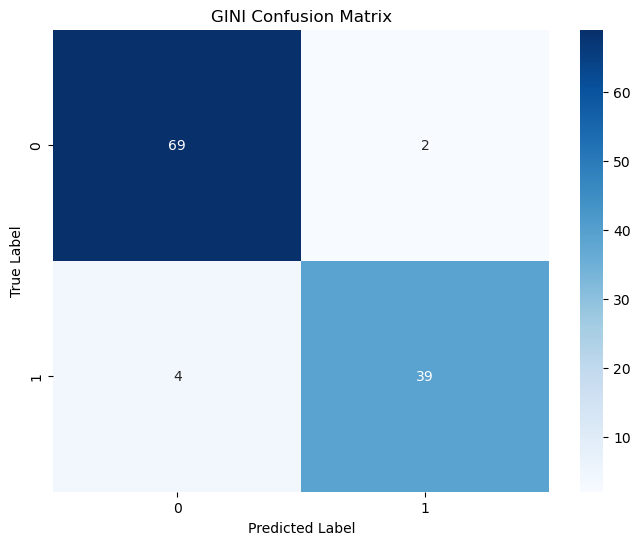

In [58]:
# f. Confusion Matrix

print("Entropy")
cm = confusion_matrix(y_test, y_pred_en)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Entrophy Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print()
print("Gini Index")

cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("GINI Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [126]:
# g. Classification Report
print("Entropy")
print(classification_report(y_test, y_pred_en))
print()
print("Gini Index")
print(classification_report(y_test, y_pred_gini))

Entropy
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Gini Index
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [127]:
# h. Results and Conclusion

The Entropy and Gini Index models show similar performance in classifying two classes. Both models have Great precision and recall for Class 0 but lower for Class 1. The overall accuracy is around 95%, with macro F1-scores of 0.94 to 0.95, indicating slightly better performance in predicting the majority class.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>


In [128]:
from sklearn.naive_bayes import GaussianNB

In [129]:
# a.
nb_classifer = GaussianNB()
nb_classifer.fit(X_train, y_train)

GaussianNB()

In [130]:
# b.
nb_y_pred = nb_classifer.predict(X_test)

In [131]:
# c. 
print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))

Model accuracy score with Naive Bayes: 0.9737


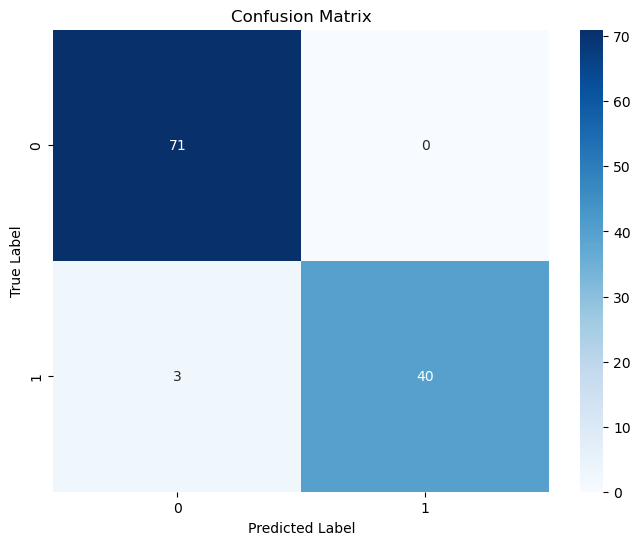

In [132]:
# d.
cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [133]:
# e. Classification Report
print(classification_report(y_test, nb_y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [134]:
# f. Results and conclusion

The model shows bad overall performance, with an accuracy of 60%. It performs worse for Class 0 than for Class 1. The averages across precision, recall, and F1-scores indicate the result may vary and is unreliable at predicting results.

## Linear Regression

---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
# Make the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Lolz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [171]:
y_pred_log = model.predict(X_test)

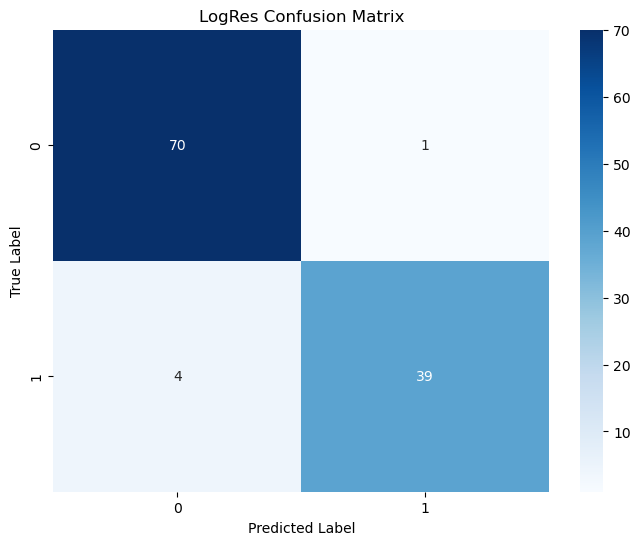

In [172]:
# Display the accuracy score
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8,6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("LogRes Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [178]:

# Make a dataframe to compare y_test and y_pred side-by-side
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred_log})
comparison_table.head()

from sklearn.metrics import confusion_matrix, classification_report

cr = classification_report(y_true=y_test, y_pred=y_pred_log)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [49]:
# f. Results and conclusion

The model's overall accuracy is 95%, which perform as well as the decision tree. it has higher precision, recall, and F1-score compared to Class 1, which has lower scores across the board. The macro and weighted averages for precision, recall, and F1-score hover around 0.94 to 0.96, indicating good performance, with some imbalance favoring Class 0.